# Ring of charge - Motion of test charge

## Modeling motion
Sometimes, you will want to model the motion of a test charge in the presence of a given field. We can do this using by seperating our second-order differential equation into two first order differential equations. The differential equation that you obtained had the form:

$$\ddot{x} = f(x)$$

Where $f$ if the acceleration, which depends on the position of the object. Using a ```while``` loop, we are unable to directly model the motion dictated by this differential equation directly. Instead, we must construct two first order equations, one for $x$ and one for $v$. This is a common practice for numerically solving differential equations:

$$\dot{v} = f(x)$$
$$\dot{x} = v$$

Notice that the second differential equation is just the definition of velocity. We can rewrite the above equations in a "iterative" format that a computer will understand:

$$v_f = v_i + f(x)*dt$$
$$x_f = x_i + v_f*dt$$

This technique is called [Euler-Cromer integration](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method) and is one of the simplest form of numerical integration. Numerical integration techniques are widely varying in their speed and accuracy, but the Euler-Cromer method is a good first one to learn.

## Problem to solve
In this notebook, we have set up a simulation that models the motion of a 1$\mu C$ charge in the presence of a ring of charge (radius $1m$ and charge $1mC$). The test charge has a mass of $1g$. The simulation uses two models - 1. the full differential equation and 2. the approximate (linearized) differential equation. The code outputs two graphs after the integration of both has completed.

The point of this problem is for you to explain the output of each model and its assumptions. We also ask that you determine under what conditions the approximate model is a good one and explain how you know. Below, we have annotated the simulation.

### Import numerical and plotting libraries

The lines below must look familiar now. First, we import ```numpy```, Python's numerical library and, then we import ```matplotlib.pyplot``` for plotting. The other two lines set up nice styles and make sure that plots occur inline and not as their own window.

In [1]:
import numpy as np                  ## Imports Python's numerical library
import matplotlib.pyplot as plt     ## Imports matplotlib for plotting
plt.style.use('fivethirtyeight')    ## Sets up pretty plots and python magic for inline plots
%matplotlib inline                  

### Setup model parameters

Below the constants and model parameters are defined for the problem including $k=\dfrac{1}{4\pi\varepsilon_0}$, the charge of the ring ($Q$), the radius of the ring ($a$), and the test charge's charge and mass ($q$ and $m$). We collect the constants that are common to both models into a constant $c=\dfrac{kqQ}{m}$.

In [2]:
k = 9e9      ## 1 over 4 pi epsilon zero

Q = 1e-3     ## Charge of ring
a = 1        ## Radius of ring

q = 1e-6     ## Charge of test charge 
m = 1e-3     ## Mass of test charge

c = k*q*Q/m  ## Collecting all the constants

### Set up time

When numerically integrating a differential equation, we must define how large a time step to take each time the loop executes ($dt$) and for how long we intend to model the motion ($t$). Below, we define the time step to be $1ms$ and we model the motion for $0.1s$. 

You have seen the ```arange``` method before. In this simulation, it creates an array called ```time``` that has entries from 0 to 0.01 in steps of 0.001. This vector indicates how many total steps we will take: 100 steps.

In [3]:
dt=0.001
time = np.arange(0,0.1,dt)

### Set up variables to track acceleration, velocity, and position

Because we are modeling the motion of the test charge, we want to keep track of its basic quantities of motion ($x$, $v$, and $a$). So we create variables (arrays) that will store each of these quantities for both the exact differential equation and the approximate one. These variables should have the same length as the time array. 

A common way to do this is to create arrays of the right length where all the entries are zero to begin with. This makes use of the ```zeros``` method from ```numpy```.

In [4]:
## Set up arrays for exact differential equation and set all entries to zero initially
pos = np.zeros(len(time))
vel = np.zeros(len(time))
accel = np.zeros(len(time))

## Set up arrays for approximate differential equation and set all entries to zero initially
posapprox = np.zeros(len(time))
velapprox = np.zeros(len(time))
accelapprox = np.zeros(len(time))

### Set initial conditions 

Any intial value problem requires that we set the starting values for the problem. In thise case, we have a differential equation of position, so we choose to set the initial position and initial velocity for each model. We want both models to solve the problem for the same initial conditions, so we set the position and veloicty for the exact model and then tell the approximate one to take those initial values also.

In [5]:
## Set the initial position and veloicty for the exact model
pos[0] = 10
vel[0] = 0

## Tell the approximate model to start from the same conditions
posapprox[0] = pos[0]
velapprox[0] = vel[0]

## Numerical integration loop
Finally, we can numerically solve our differential equations. We will use a ```while``` loop that runs until the integration time has expired; that is it will run for 100 steps.

For both models, the loop follows the Euler-Cromer integration procedure:
1. Calculate the acceleration the particle experiences at the present moment
2. Update the velocity with this acceleration information ($v_f = v_i + a*dt$)
3. Update the position with this veloicty information ($x_f = x_i + v_f*dt$)
4. Repeat 1-3 until time expires

While these calculations are being done, the values of the acceleration, velocity, and position are being stored in the arrays to be plotted later.

In [6]:
i = 0   ## Set up the counter

## Calculation loop
while i < len(time)-1:
    
    ## Perform Euler-Cromer integation for the exact differential equation
    accel[i] = -1*c*pos[i]/np.sqrt(pos[i]**2+a**2)**(3/2)
    vel[i+1] = vel[i] + accel[i]*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    
    ## Perform Euler-Cromer integration for the apprxomaite differential equation
    accelapprox[i] = -1*c*posapprox[i]/a**3
    velapprox[i+1] = velapprox[i] + accelapprox[i]*dt
    posapprox[i+1] = posapprox[i] + velapprox[i+1]*dt
    
    ## Update the step
    i = i + 1

### Plotting your results

Below two plots are produced, it will be your job to explain them and any others that you produce.

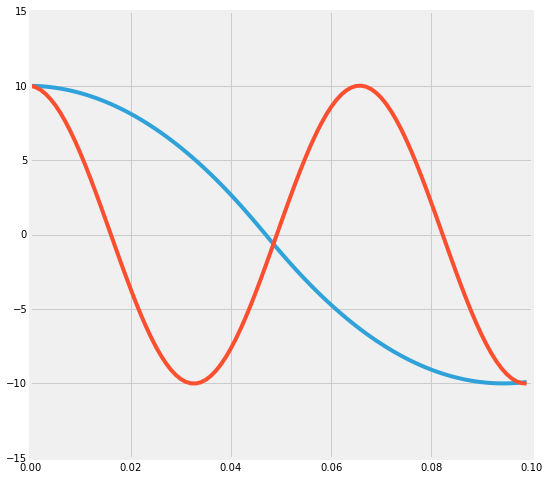

In [7]:
plt.figure(figsize=(8,8))
plt.plot(time,pos)
plt.plot(time,posapprox)